In [ ]:
#name: Dudhe Pooja 
PRN:2301208032

In [12]:
# importing necessary libraries
import pandas as pd
import datetime as dt
import numpy as np
 
# importing the data
df = pd.read_csv("synthetic_sales_data.csv")
df.head()

,Order Date,Ship Date,Customer Name,Status,Category,Segment,Sub-Category,Sales,Quantity,Discount,Profit
0,2024-02-02 06:05:14.337419,2024-11-05 06:05:14.337623,Customer 1,Pending,Furniture,Consumer,Chairs,80.90,3,0.09,12.50
1,2024-08-05 06:05:14.337439,2024-10-26 06:05:14.337625,Customer 2,Pending,Technology,Consumer,Phones,173.59,2,0.16,63.16
2,2023-11-23 06:05:14.337443,2024-10-26 06:05:14.337627,Customer 3,Pending,Technology,Corporate,Binders,390.79,4,0.29,61.08
3,2023-12-24 06:05:14.337445,2024-11-09 06:05:14.337629,Customer 4,Delivered,Furniture,Consumer,Binders,227.61,5,0.21,197.00
4,2024-11-06 06:05:14.337447,2024-11-03 06:05:14.337630,Customer 5,Cancelled,Furniture,Corporate,Art,441.46,5,0.14,10.13


Calculating Recency

In [16]:
import pandas as pd

df_recency['LastPurchaseDate'] = pd.to_datetime(df_recency['LastPurchaseDate'])
recent_date = df_recency['LastPurchaseDate'].max()
df_recency['Recency'] = df_recency['LastPurchaseDate'].apply(
    lambda x: (recent_date - x).days)
print(df_recency.head())

  CustomerName LastPurchaseDate  Recency
0  Customer100       2020-05-09     1313
1   Customer12       2021-09-12      822
2   Customer13       2022-09-19      450
3   Customer14       2021-02-24     1022
4   Customer15       2023-09-26       78


Calculating Frequency

In [17]:
frequency_df = df.drop_duplicates().groupby(
    by=['Customer Name'], as_index=False)['Order Date'].count()
frequency_df.columns = ['CustomerName', 'Frequency']
frequency_df.head()

,CustomerName,Frequency
0,Customer100,1
1,Customer12,2
2,Customer13,2
3,Customer14,2
4,Customer15,2


In [18]:
df['Total'] = df['Sales']*df['Quantity']
monetary_df = df.groupby(by='Customer Name', as_index=False)['Total'].sum()
monetary_df.columns = ['CustomerName', 'Monetary']
monetary_df.head()

,CustomerName,Monetary
0,Customer100,1320.92
1,Customer12,4839.17
2,Customer13,4895.63
3,Customer14,10039.27
4,Customer15,6945.98


Merging all three columns in one dataframe

In [19]:
rf_df = df_recency.merge(frequency_df, on='CustomerName')
rfm_df = rf_df.merge(monetary_df, on='CustomerName').drop(
    columns='LastPurchaseDate')
rfm_df.head()

,CustomerName,Recency,Frequency,Monetary
0,Customer100,1313,1,1320.92
1,Customer12,822,2,4839.17
2,Customer13,450,2,4895.63
3,Customer14,1022,2,10039.27
4,Customer15,78,2,6945.98


Ranking Customer’s based upon their recency, frequency, and monetary score

In [20]:
rfm_df['R_rank'] = rfm_df['Recency'].rank(ascending=False)
rfm_df['F_rank'] = rfm_df['Frequency'].rank(ascending=True)
rfm_df['M_rank'] = rfm_df['Monetary'].rank(ascending=True)
 
# normalizing the rank of the customers
rfm_df['R_rank_norm'] = (rfm_df['R_rank']/rfm_df['R_rank'].max())*100
rfm_df['F_rank_norm'] = (rfm_df['F_rank']/rfm_df['F_rank'].max())*100
rfm_df['M_rank_norm'] = (rfm_df['F_rank']/rfm_df['M_rank'].max())*100
 
rfm_df.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)
 
rfm_df.head()

,CustomerName,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm
0,Customer100,1313,1,1320.92,5.970149,30.827068,30.597015
1,Customer12,822,2,4839.17,43.283582,78.195489,77.611940
2,Customer13,450,2,4895.63,68.656716,78.195489,77.611940
3,Customer14,1022,2,10039.27,28.358209,78.195489,77.611940
4,Customer15,78,2,6945.98,92.537313,78.195489,77.611940


Calculating RFM score

In [21]:
rfm_df['RFM_Score'] = 0.15*rfm_df['R_rank_norm']+0.28 * \
    rfm_df['F_rank_norm']+0.57*rfm_df['M_rank_norm']
rfm_df['RFM_Score'] *= 0.05
rfm_df = rfm_df.round(2)
rfm_df[['CustomerName', 'RFM_Score']].head(7)

,CustomerName,RFM_Score
0,Customer100,1.35
1,Customer12,3.63
2,Customer13,3.82
3,Customer14,3.52
4,Customer15,4.00
5,Customer16,2.03
6,Customer17,3.98


Customer100: RFM score = 1.35 → Lost Customer (RFM score < 1.6)
Customer12: RFM score = 3.63 → Medium Value Customer (4 > RFM score > 3)
Customer13: RFM score = 3.82 → Medium Value Customer (4 > RFM score > 3)
Customer14: RFM score = 3.52 → Medium Value Customer (4 > RFM score > 3)
Customer15: RFM score = 4.00 → High Value Customer (4.5 > RFM score > 4)
Customer16: RFM score = 2.03 → Low-value Customer (3 > RFM score > 1.6)
Customer17: RFM score = 3.98 → Medium Value Customer (4 > RFM score > 3)

In [22]:
rfm_df["Customer_segment"] = np.where(rfm_df['RFM_Score'] >
                                      4.5, "Top Customers", 
                                      (np.where(
                                        rfm_df['RFM_Score'] > 4,
                                        "High value Customer",
                                        (np.where(
    rfm_df['RFM_Score'] > 3,
                             "Medium Value Customer",
                             np.where(rfm_df['RFM_Score'] > 1.6, 
                            'Low Value Customers', 'Lost Customers'))))))
rfm_df[['CustomerName', 'RFM_Score', 'Customer_segment']].head(20)

,CustomerName,RFM_Score,Customer_segment
0,Customer100,1.35,Lost Customers
1,Customer12,3.63,Medium Value Customer
2,Customer13,3.82,Medium Value Customer
3,Customer14,3.52,Medium Value Customer
4,Customer15,4.00,Medium Value Customer
5,Customer16,2.03,Low Value Customers
6,Customer17,3.98,Medium Value Customer
7,Customer18,1.42,Lost Customers
8,Customer19,3.97,Medium Value Customer
9,Customer2,3.61,Medium Value Customer


Visualizing the customer segments


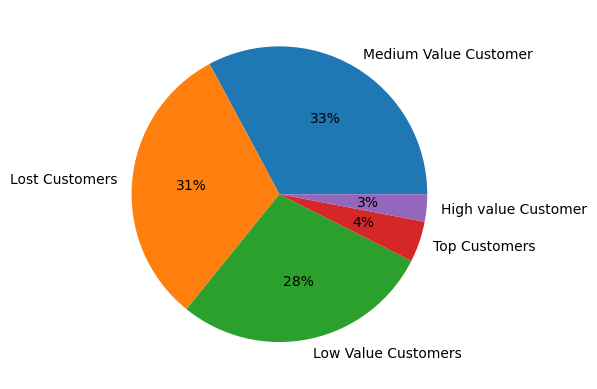

In [24]:
import matplotlib.pyplot as plt
plt.pie(rfm_df.Customer_segment.value_counts(),
        labels=rfm_df.Customer_segment.value_counts().index,
        autopct='%.0f%%')
plt.show()